In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

Matplotlib is building the font cache; this may take a moment.


In [20]:
# Load the dataset
df = pd.read_csv('../data/raw/transactions.csv')
print("Dataset loaded successfully.")

print(f"Dataset Shape: {df.shape}")
print("\nData Info:")
df.info()

print("\nFirst 5 Rows:")
display(df.head())
display(df.describe())
    

Dataset loaded successfully.
Dataset Shape: (95662, 16)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  Pr

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [22]:
# Correcting data types
df['PricingStrategy'] = df['PricingStrategy'].astype('object')
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

In [ ]:
# the time frame of our data
min_date = df['TransactionStartTime'].min()
max_date = df['TransactionStartTime'].max()

print(f"Earliest Transaction Date: {min_date}")
print(f"Latest Transaction Date:   {max_date}")

time_span = max_date - min_date
print(f"Total Time Span of Data: {time_span}")

Earliest Transaction Date: 2018-11-15 02:18:49+00:00
Latest Transaction Date:   2019-02-13 10:01:28+00:00
Total Time Span of Data: 90 days 07:42:39


Fraud Result Distribution:
FraudResult
0    95469
1      193
Name: count, dtype: int64

Fraud Percentage: 0.2018%


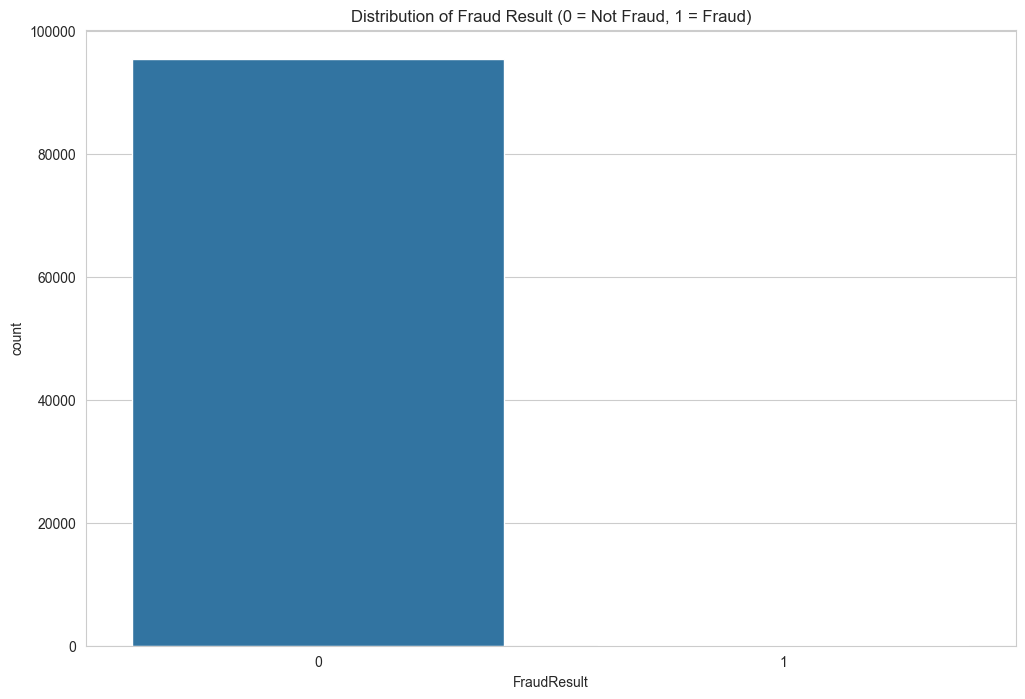

In [16]:
# Analyze FraudResult
fraud_counts = df['FraudResult'].value_counts()
fraud_percentage = df['FraudResult'].value_counts(normalize=True) * 100

print("Fraud Result Distribution:")
print(fraud_counts)
print(f"\nFraud Percentage: {fraud_percentage[1]:.4f}%")

sns.countplot(x='FraudResult', data=df)
plt.title('Distribution of Fraud Result (0 = Not Fraud, 1 = Fraud)')
plt.show()

Statistics for Non-Fraudulent Transactions (FraudResult=0):


,Amount,Value
count,9.546900e+04,9.546900e+04
mean,3.627723e+03,6.763227e+03
std,4.035711e+04,3.999484e+04
min,-1.000000e+06,2.000000e+00
25%,-5.000000e+01,2.500000e+02
50%,1.000000e+03,1.000000e+03
75%,2.500000e+03,5.000000e+03
max,2.400000e+06,2.400000e+06



Statistics for Fraudulent Transactions (FraudResult=1):


,Amount,Value
count,1.930000e+02,1.930000e+02
mean,1.535272e+06,1.561820e+06
std,2.100525e+06,2.081227e+06
min,-9.000000e+05,5.000000e+02
25%,5.000000e+05,5.000000e+05
50%,6.000000e+05,6.500000e+05
75%,2.000000e+06,2.000000e+06
max,9.880000e+06,9.880000e+06


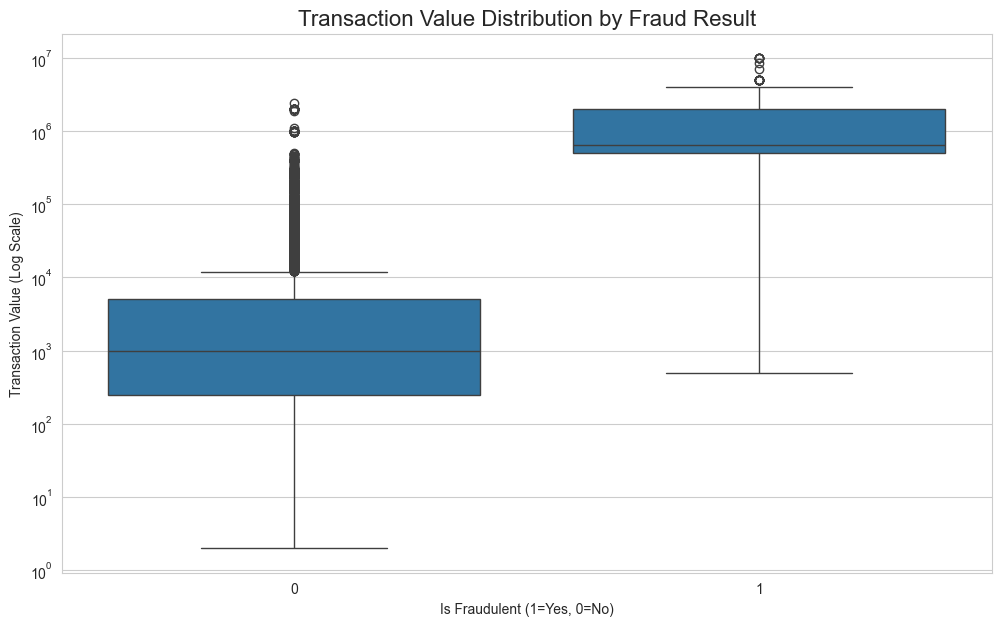

In [24]:
# Compare statistical properties of fraudulent vs. non-fraudulent transactions
print("Statistics for Non-Fraudulent Transactions (FraudResult=0):")
display(df[df['FraudResult'] == 0][['Amount', 'Value']].describe())

print("\nStatistics for Fraudulent Transactions (FraudResult=1):")
display(df[df['FraudResult'] == 1][['Amount', 'Value']].describe())

# Visualization: Are fraudulent transactions typically larger or smaller?
plt.figure(figsize=(12, 7))
sns.boxplot(x='FraudResult', y='Value', data=df)
plt.title('Transaction Value Distribution by Fraud Result', fontsize=16)
plt.yscale('log') # Use log scale due to extreme outliers
plt.xlabel('Is Fraudulent (1=Yes, 0=No)')
plt.ylabel('Transaction Value (Log Scale)')
plt.show()

Pricing Strategy Distribution:
PricingStrategy
2    79848
4    13562
1     1867
0      385
Name: count, dtype: int64


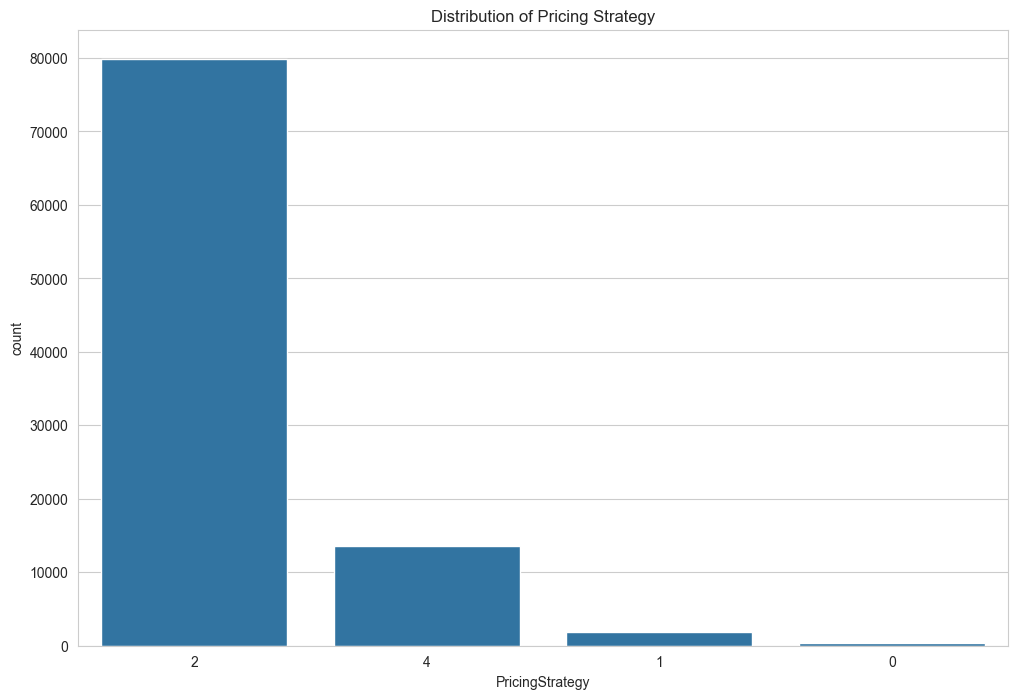

In [14]:
# Analyze Pricing Strategy
print("Pricing Strategy Distribution:")
print(df['PricingStrategy'].value_counts())

sns.countplot(x='PricingStrategy', data=df, order=df['PricingStrategy'].value_counts().index)
plt.title('Distribution of Pricing Strategy')
plt.show()

Fraud Rate (%) by Product Category:
ProductCategory
transport             8.000000
utility_bill          0.625000
financial_services    0.354586
airtime               0.039976
data_bundles          0.000000
other                 0.000000
movies                0.000000
ticket                0.000000
tv                    0.000000
Name: FraudResult, dtype: float64


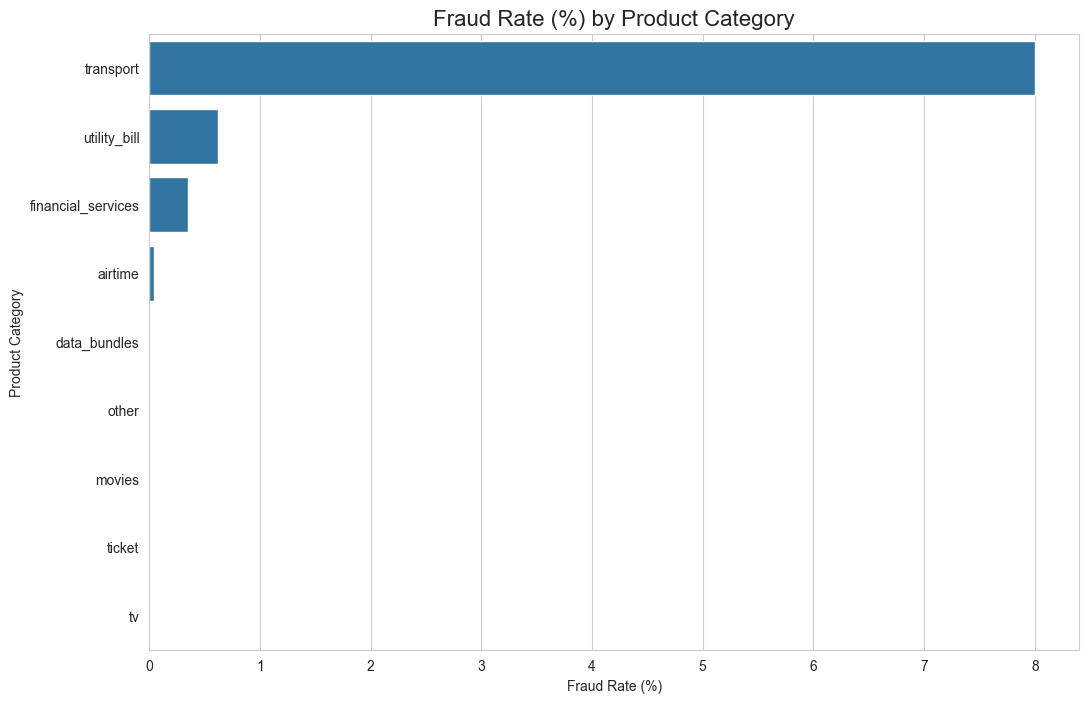

In [25]:
# Calculate fraud rate per product category
fraud_rate_by_product = df.groupby('ProductCategory')['FraudResult'].mean().sort_values(ascending=False) * 100

print("Fraud Rate (%) by Product Category:")
print(fraud_rate_by_product)

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x=fraud_rate_by_product.values, y=fraud_rate_by_product.index, orient='h')
plt.title('Fraud Rate (%) by Product Category', fontsize=16)
plt.xlabel('Fraud Rate (%)')
plt.ylabel('Product Category')
plt.show()

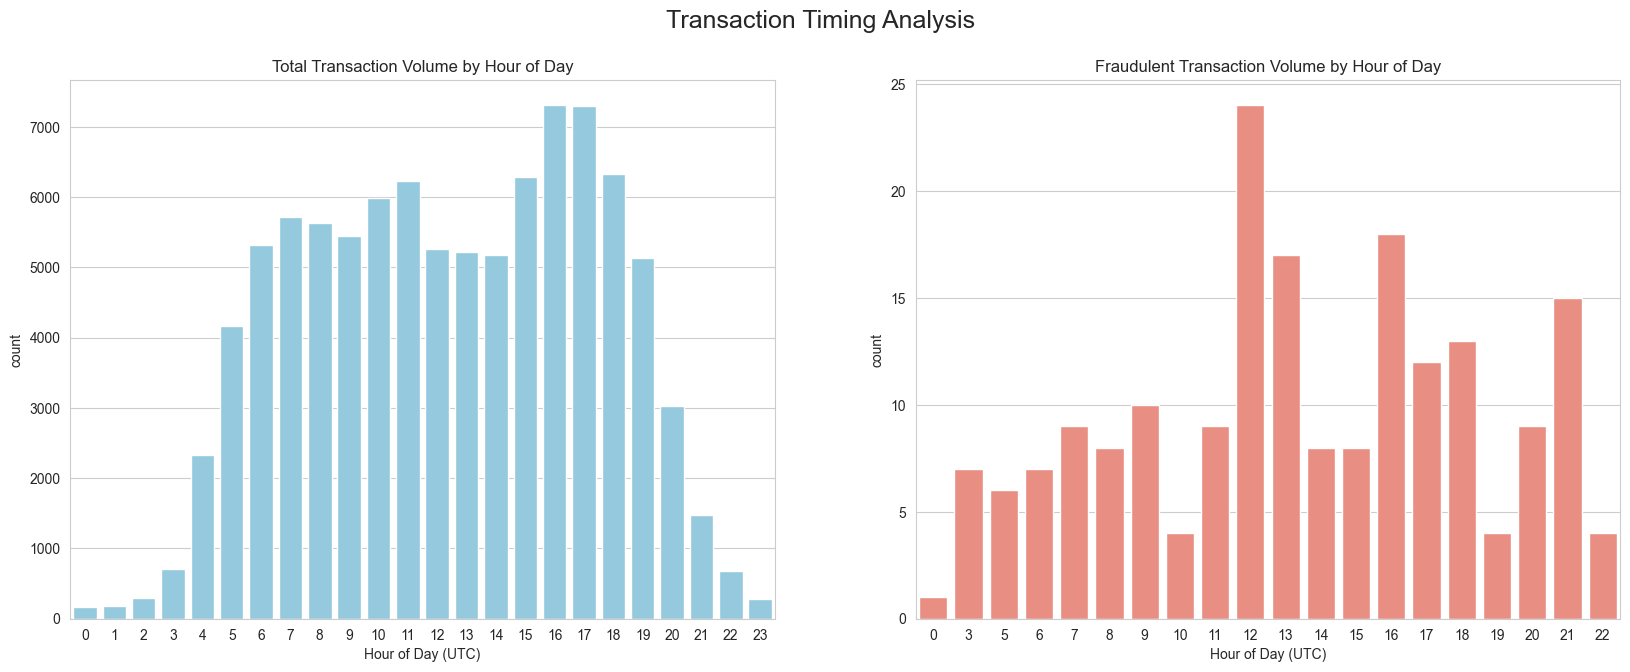

In [27]:
# See if high-risk transactions happen at unusual times.
df['hour_of_day'] = df['TransactionStartTime'].dt.hour
df['day_of_week'] = df['TransactionStartTime'].dt.day_name()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Plot 1: All Transactions by Hour
sns.countplot(x='hour_of_day', data=df, ax=axes[0], color='skyblue')
axes[0].set_title('Total Transaction Volume by Hour of Day')
axes[0].set_xlabel('Hour of Day (UTC)')

# Plot 2: Fraudulent Transactions by Hour
sns.countplot(x='hour_of_day', data=df[df['FraudResult'] == 1], ax=axes[1], color='salmon')
axes[1].set_title('Fraudulent Transaction Volume by Hour of Day')
axes[1].set_xlabel('Hour of Day (UTC)')
plt.suptitle('Transaction Timing Analysis', fontsize=18)
plt.show()